In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set_theme()
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv("BankChurners_v2.csv")

In [3]:
data.shape

(10127, 23)

In [4]:
data.head(
  
)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,90032,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,90033,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,90034,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,90035,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,90036,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# Data cleaning
data.shape

(10127, 23)

In [6]:
# check for unique ID
data["CLIENTNUM"].nunique()

10127

In [7]:
# Drop duplicate
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(10127, 23)

In [9]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [10]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [11]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [12]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [13]:
data[data["Education_Level"].isna()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,90038,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
11,90043,Existing Customer,65,M,1,NaN,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
15,90047,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
17,90049,Existing Customer,41,M,3,NaN,Married,$80K - $120K,Blue,34,4,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
23,90055,Existing Customer,47,F,4,NaN,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,100122,Existing Customer,36,F,3,NaN,Married,$40K - $60K,Blue,22,5,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175
10094,100126,Existing Customer,59,M,1,NaN,Single,$60K - $80K,Blue,48,3,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000
10095,100127,Existing Customer,46,M,3,NaN,Married,$80K - $120K,Blue,33,4,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10118,100150,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [14]:
data["Education_Level"]=data["Education_Level"].fillna("Unknown")
data["Marital_Status"]=data["Marital_Status"].fillna("Unknown")
data["Income_Category"]=data["Income_Category"].fillna("Unknown")

In [15]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [16]:
# Binning
print(data['Customer_Age'].min())
print(data['Customer_Age'].max())

26
73


In [17]:
# Pandas.cut method requires bins and labels.
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s,', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

In [18]:
data[data['Customer_Age']==41]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_bins
17,90049,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,4,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095,40s
22,90054,Existing Customer,41,M,3,High School,Married,$40K - $60K,Blue,33,4,2,1,4470.0,680,3790.0,1.608,931,18,1.571,0.152,40s
25,90057,Existing Customer,41,F,3,Graduate,Single,Less than $40K,Blue,28,6,1,2,7768.0,1669,6099.0,0.797,1051,22,0.833,0.215,40s
32,90064,Existing Customer,41,M,4,Graduate,Married,$60K - $80K,Blue,36,4,1,2,8923.0,2517,6406.0,1.726,1589,24,1.667,0.282,40s
101,90133,Existing Customer,41,F,3,Unknown,Married,Unknown,Silver,34,5,3,3,34516.0,2053,32463.0,1.034,1487,26,0.733,0.059,40s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,100006,Existing Customer,41,M,4,Post-Graduate,Married,$40K - $60K,Silver,36,3,3,2,16268.0,817,15451.0,0.640,13969,120,0.690,0.050,40s
9977,100009,Attrited Customer,41,F,3,Uneducated,Married,Less than $40K,Blue,30,1,2,3,9491.0,0,9491.0,1.056,9061,51,1.684,0.000,40s
10035,100067,Existing Customer,41,F,3,Graduate,Single,Less than $40K,Blue,36,4,6,2,4133.0,1067,3066.0,0.632,16100,119,0.608,0.258,40s
10077,100109,Existing Customer,41,F,4,Graduate,Divorced,$40K - $60K,Blue,36,4,1,0,5654.0,2470,3184.0,0.637,15123,111,0.881,0.437,40s


In [19]:
data['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [20]:
Attrited_Percent = data['Attrition_Flag'].value_counts()['Attrited Customer']/data.shape[0]*100
print(f'{np.round(Attrited_Percent,2)} %')

16.07 %


In [21]:
a = list[0,50,5]
print(f'{a}')

list[0, 50, 5]


In [22]:
a = list(range(0,50,5))

In [23]:
a

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [24]:
sum(a)

225

In [25]:
np.mean(a)

22.5

In [26]:
sum(a)/len(a)

22.5

In [29]:
a = list(range(0,50,5))
print(a)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


In [30]:
series_a = pd.Series(a)

In [31]:
print(series_a)

0     0
1     5
2    10
3    15
4    20
5    25
6    30
7    35
8    40
9    45
dtype: int64


In [32]:
series_a.describe()

count    10.000000
mean     22.500000
std      15.138252
min       0.000000
25%      11.250000
50%      22.500000
75%      33.750000
max      45.000000
dtype: float64

In [33]:
help pd.descibe()

SyntaxError: invalid syntax (3526836663.py, line 1)

In [35]:
series_a.columns()

AttributeError: 'Series' object has no attribute 'columns'

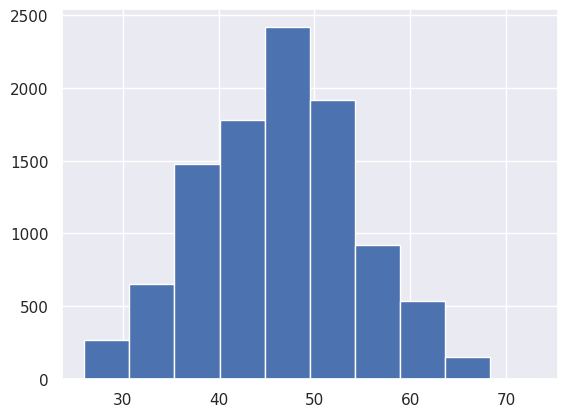

In [38]:
plt.hist(data['Customer_Age']);

In [37]:
data['Customer_Age']

0        45
1        49
2        51
3        40
4        40
         ..
10122    50
10123    41
10124    44
10125    30
10126    43
Name: Customer_Age, Length: 10127, dtype: int64

(array([ 188.,  278.,  546., 1208., 1265., 3485., 1515.,  825.,  479.,
         338.]),
 array([13. , 17.3, 21.6, 25.9, 30.2, 34.5, 38.8, 43.1, 47.4, 51.7, 56. ]),
 <BarContainer object of 10 artists>)

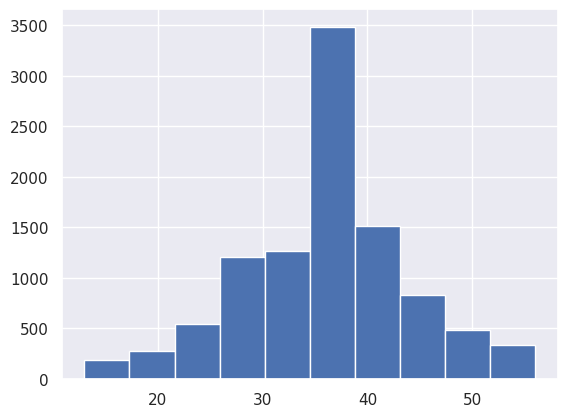

In [39]:
plt.hist(data['Months_on_book'])